# Imports

In [52]:
import pandas as pd
from random import choice
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import os
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

In [53]:
os.getcwd()

'c:\\Users\\Andy\\Desktop\\VS Code Directory\\Billups Interview Case'

In [54]:
libraries_df = pd.read_csv('libraries.csv')
libraries_df

,id,name,street_address,city,region,postal_code
0,226-222@5xc-kc4-fpv,Multnomah County Library Capitol Hill,10723 SW capitol Hwy,Portland,OR,97219
1,23v-222@5xc-jv7-v4v,Multnomah County Library Northwest,2300 NW Thurman St,NaN,or,NaN
2,222-222@5xc-jvf-skf,Multnomah County Library St Johns,7510 N Charleston Ave,portland,or,97203
3,227-222@5xc-jww-btv,Multnomah County Library Hillsdale,1525 SW Sunset blvd,Portland,or,-97239
4,22d-222@5xc-kcy-8sq,Multnomah County Library Sellwood Moreland,7860 SE 13th AVE,Portland,OR,97202
5,223-222@5xc-jxr-tgk,MULTNOMAH County Library Woodstock,6008 se 49TH AVE,Portland,OR,-97206
6,zzw-224@5xc-jwv-2rk,Multnomah County Library Central,801 SW 10th Ave,Portland,NaN,97205
7,zzw-223@5xc-jv7-ct9,Friends OF the multnomah COUNTY Library,522 SW 5th Ave,NaN,OR,97204
8,226-222@5xc-jxj-7yv,Multnomah County Library Belmont,1038 SE CESAR E CHAVEZ blvd,Portland,OR,97214
9,zzw-222@5xc-knn-c5z,Multnomah County Library Holgate,7905 SE Holgate Blvd,Portland,OR,NaN


In [55]:
books_df = pd.read_csv('books.csv')
books_df

,id,title,authors,publisher,publishedDate,categories,price,pages
0,hVFwAAAAQBAJ,Ogilvy on Advertising,['David Ogilvy'],Vintage,2013-09-11,['Social Science'],72.99,320
1,bRY9AAAAYAAJ,Foreign Publications for Advertising American ...,['United States. Bureau of Foreign and Domesti...,NaN,1913,['Advertising'],469.99,654
2,ZapAAAAAIAAJ,Advertising and the Public Interest,"['John A. Howard', 'James Hulbert']",NaN,1973,['Advertising'],372.0,784
3,A-HthMfF5moC,Profitable Advertising,NaN,NaN,1894,['Advertising'],240.99USD,559
4,4Z9JAAAAMAAJ,Report of the Federal Trade Commission on Dist...,['United States. Federal Trade Commission'],NaN,1944,['Government publications'],539.0,757
...,...,...,...,...,...,...,...,...
235,W58mAQAAIAAJ,Political and Commercial Control of the Minera...,['United States. Dept. of the Interior'],NaN,1918,NaN,153.0,503
236,frzDCQAAQBAJ,Water Resources Management IV,"['C.A. Brebbia', 'A. Kungolos']",WIT Press,2007-05-08,['Nature'],563.5,780
237,mQTxAAAAMAAJ,"Department Publications - State of California,...",['California. Dept. of Water Resources'],NaN,1995,['Hydrology'],216.5|,748
238,lMkmAQAAMAAJ,Technical Report - South Carolina Marine Resou...,['South Carolina. Marine Resources Division'],NaN,1979,['Marine resources'],11.5,236


In [56]:
customers_df = pd.read_csv('customers.csv')
customers_df

,id,name,street_address,city,state,zipcode,birth_date,gender,education,occupation
0,df83ec2d0d409395c0d8c2690cfa8b67,Cynthia Barnfield,44 NE Meikle Pl,Portland,Oregon,97213.0,2009-09-10,female,High School,NaN
1,6aec7ab2ea0d67161dac39e5dcabd857,Elizabeth Smith,7511 SE Harrison St,Portland,Oregon,97215.0,1956-12-15,female,College,Blue Collar
2,0c54340672f510fdb9d2f30595c1ab53,Richard Pabla,1404 SE Pine St,Portland,Oregon,97214.0,1960-12-18,male,College,Education & Health
3,f0d9ce833ddc1f73c1e0b55bdebf012e,Charles Baker,12271 N Westshore Dr,Portland,Oregon,97217.0,2105-07-19,male,Graduate Degree,SALES
4,3720379163f6b46944db6c98c0485bfd,Ronald Lydon,5321 NE Skyport Way,NaN,Oregon,97218.0,1961-03-14,male,Graduate Degree,Blue Collar
...,...,...,...,...,...,...,...,...,...,...
1995,ae55f0b71b8b8e91945cd9a91b6e45ee,JOE Roberts,7331 NE Killingsworth St,Portland,NaN,97218.0,1955-05-23,male,Others,Business & Finance
1996,07fe407cc889ea21a8bdc04c305960b1,Matthew Coniglio,1908 NW Harborside Dr,Vancouver,washington,98660.0,1975-11-10,male,Others,Business & Finance
1997,9a2194fcd4f0f326f0ca334450e16a93,Earl Grier,22 NE graham ST,Portland,OREGON,97212.0,2007-10-02,male,Others,Education & Health
1998,01a598a05c48fdd18461d6411f51a109,Rogelio Richmann,7000 NE Airport Way,Portland,OREGON,97218.0,2001-02-19,male,College,Business & Finance


In [57]:
checkouts_df = pd.read_csv('checkouts.csv')
checkouts_df

,id,patron_id,library_id,date_checkout,date_returned
0,-xFj0vTLbRIC,b071c9c68228a2b1d00e6f53677e16da,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13
1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12
2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24
3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25
4,7T9-BAAAQBAJ,2cf3cc3b9e9f6c608767da8d350f77c9,225-222@5xc-jtz-hkf,2018-12-31,1804-01-23
...,...,...,...,...,...
1995,rNbuDwAAQBAJ,91871955f3641857832766ac3f5a0b95,222-222@5xc-jv5-nt9,2018-07-19,2018-08-12
1996,rcrCAgAAQBAJ,ad08956eb20efb746af650f906d439cf,22d-222@5xc-kcy-8sq,2018-03-07,2018-03-13
1997,F44fAQAAMAAJ,026262cc3454149303074c4113b5f118,226-222@5xc-jxj-7yv,2018-06-17,2018-06-27
1998,Ci1HAQAAMAAJ,08b29865e58e9b2aabff9684a703acf0,223-222@5xc-jxr-tgk,2018-12-10,2018-12-29


## Cleaning

1. Go through all csv files, check for missing values, and anomolies
2. Check each columns and validate all columns


## Libraries.csv 

1. contains 6 columns 18 rows
2. all 18 libraries address were searched online to validate they are all in Portland. 
3. After confirming with google maps, impute NULL city with Portland, NULL regions with OREGON.
4. Postal code column becomes redundant as postal code information is contained in street_addresss, city, and state.

In [58]:
libraries_df['city'] = "Portland"
libraries_df.rename(columns={'region': 'state'}, inplace=True)
libraries_df['state'] = "OREGON"

In [59]:
libraries_df

,id,name,street_address,city,state,postal_code
0,226-222@5xc-kc4-fpv,Multnomah County Library Capitol Hill,10723 SW capitol Hwy,Portland,OREGON,97219
1,23v-222@5xc-jv7-v4v,Multnomah County Library Northwest,2300 NW Thurman St,Portland,OREGON,NaN
2,222-222@5xc-jvf-skf,Multnomah County Library St Johns,7510 N Charleston Ave,Portland,OREGON,97203
3,227-222@5xc-jww-btv,Multnomah County Library Hillsdale,1525 SW Sunset blvd,Portland,OREGON,-97239
4,22d-222@5xc-kcy-8sq,Multnomah County Library Sellwood Moreland,7860 SE 13th AVE,Portland,OREGON,97202
5,223-222@5xc-jxr-tgk,MULTNOMAH County Library Woodstock,6008 se 49TH AVE,Portland,OREGON,-97206
6,zzw-224@5xc-jwv-2rk,Multnomah County Library Central,801 SW 10th Ave,Portland,OREGON,97205
7,zzw-223@5xc-jv7-ct9,Friends OF the multnomah COUNTY Library,522 SW 5th Ave,Portland,OREGON,97204
8,226-222@5xc-jxj-7yv,Multnomah County Library Belmont,1038 SE CESAR E CHAVEZ blvd,Portland,OREGON,97214
9,zzw-222@5xc-knn-c5z,Multnomah County Library Holgate,7905 SE Holgate Blvd,Portland,OREGON,NaN


## Books.csv 

1. authors column has an inconsistant dtype, thus column type is converted from string to list.
2. Homogenizing the format of publish date of books.
3. categories column contains nested list, however each list contain just one book category. therefore un-nest list in the categories column. 
4. change dtype of prices and pages to numerical 

In [60]:
books_df['authors'] = books_df['authors'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
books_df['publishedDate'] = books_df['publishedDate'].apply(lambda x: pd.to_datetime(x, errors='coerce').year if pd.notna(x) and x != '' else x)
books_df['categories'] = books_df['categories'].apply(func=lambda x: eval(x)[0] if pd.notna(x) and x != '' else x)
books_df['price'] = books_df['price'].apply(lambda x: float(''.join([i for i in x if i.isnumeric() or i == '.'])) if pd.notna(x) and x != '' else x)
books_df['pages'] = books_df['pages'].apply(lambda x: int(''.join([i for i in x if i.isnumeric()])) if pd.notna(x) and x != '' else x)

In [61]:
books_df

,id,title,authors,publisher,publishedDate,categories,price,pages
0,hVFwAAAAQBAJ,Ogilvy on Advertising,[David Ogilvy],Vintage,2013.0,Social Science,72.99,320
1,bRY9AAAAYAAJ,Foreign Publications for Advertising American ...,[United States. Bureau of Foreign and Domestic...,NaN,1913.0,Advertising,469.99,654
2,ZapAAAAAIAAJ,Advertising and the Public Interest,"[John A. Howard, James Hulbert]",NaN,1973.0,Advertising,372.00,784
3,A-HthMfF5moC,Profitable Advertising,[],NaN,1894.0,Advertising,240.99,559
4,4Z9JAAAAMAAJ,Report of the Federal Trade Commission on Dist...,[United States. Federal Trade Commission],NaN,1944.0,Government publications,539.00,757
...,...,...,...,...,...,...,...,...
235,W58mAQAAIAAJ,Political and Commercial Control of the Minera...,[United States. Dept. of the Interior],NaN,1918.0,NaN,153.00,503
236,frzDCQAAQBAJ,Water Resources Management IV,"[C.A. Brebbia, A. Kungolos]",WIT Press,2007.0,Nature,563.50,780
237,mQTxAAAAMAAJ,"Department Publications - State of California,...",[California. Dept. of Water Resources],NaN,1995.0,Hydrology,216.50,748
238,lMkmAQAAMAAJ,Technical Report - South Carolina Marine Resou...,[South Carolina. Marine Resources Division],NaN,1979.0,Marine resources,11.50,236


## Customers.csv
1. approx 87% of customers are from portland, 8% from other regions, and 5% are missing
2. missing values are converted in to a boolean to later check if values are missing at random/any correlation with the dependent variable(late return)
3. create a age column  from birthdate column
4. Impute missing values for gender, given a quick correlation check, missingness does not seem to have a strong correlation with any variables, and given null gender values are less than 5% of the column, missing values were randomly assigned to a gender with 50/50 probability. 
5. education and occupation columns were cleaned for string consistancy. 

In [62]:
customers_df['city'] = customers_df['city'].apply(lambda x: x.strip().title() if pd.notna(x) and x != '' else 'MISSING')
customers_df['city'] = customers_df['city'].apply(lambda x: x if x in {"Portland", 'MISSING'} else 'Not Portland')
customers_df['state'] = customers_df['state'].apply(lambda x: x.strip().upper() if pd.notna(x) and x != '' else 'MISSING')
customers_df['city'].unique()
customers_df['state'].unique()

array(['OREGON', 'WASHINGTON', 'MISSING'], dtype=object)

In [63]:
customers_df['birth_date'] = customers_df['birth_date'].apply(lambda x: pd.to_datetime(x, errors='coerce') if pd.notna(x) and x != '' else x)
today = datetime.today()
customers_df['age'] = customers_df['birth_date'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)) if pd.notna(x) else None)
customers_df['age'] = customers_df['age'].apply(lambda x: x if 1 <= x <= 100 else None)

In [64]:
customers_df['gender'] = customers_df['gender'].apply(lambda x: x.strip().upper() if pd.notna(x) and x != '' else choice(['MALE', 'FEMALE']))
customers_df['gender'].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [65]:
customers_df['education'] = customers_df['education'].apply(lambda x: x.title().replace(' ', '') if pd.notna(x) and x != '' else x)
customers_df['education'].unique()

array(['HighSchool', 'College', 'GraduateDegree', 'Others', nan],
      dtype=object)

In [66]:
customers_df['occupation'] = customers_df['occupation'].apply(lambda x: x.title().replace(' ', '') if pd.notna(x) and x != '' else x)
customers_df['occupation'].unique()

array([nan, 'BlueCollar', 'Education&Health', 'Sales', 'Tech', 'Others',
       'Business&Finance', 'Admin&Support'], dtype=object)

In [67]:
customers_df

,id,name,street_address,city,state,zipcode,birth_date,gender,education,occupation,age
0,df83ec2d0d409395c0d8c2690cfa8b67,Cynthia Barnfield,44 NE Meikle Pl,Portland,OREGON,97213.0,2009-09-10,FEMALE,HighSchool,NaN,15.0
1,6aec7ab2ea0d67161dac39e5dcabd857,Elizabeth Smith,7511 SE Harrison St,Portland,OREGON,97215.0,1956-12-15,FEMALE,College,BlueCollar,68.0
2,0c54340672f510fdb9d2f30595c1ab53,Richard Pabla,1404 SE Pine St,Portland,OREGON,97214.0,1960-12-18,MALE,College,Education&Health,64.0
3,f0d9ce833ddc1f73c1e0b55bdebf012e,Charles Baker,12271 N Westshore Dr,Portland,OREGON,97217.0,2105-07-19,MALE,GraduateDegree,Sales,NaN
4,3720379163f6b46944db6c98c0485bfd,Ronald Lydon,5321 NE Skyport Way,MISSING,OREGON,97218.0,1961-03-14,MALE,GraduateDegree,BlueCollar,63.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,ae55f0b71b8b8e91945cd9a91b6e45ee,JOE Roberts,7331 NE Killingsworth St,Portland,MISSING,97218.0,1955-05-23,MALE,Others,Business&Finance,69.0
1996,07fe407cc889ea21a8bdc04c305960b1,Matthew Coniglio,1908 NW Harborside Dr,Not Portland,WASHINGTON,98660.0,1975-11-10,MALE,Others,Business&Finance,49.0
1997,9a2194fcd4f0f326f0ca334450e16a93,Earl Grier,22 NE graham ST,Portland,OREGON,97212.0,2007-10-02,MALE,Others,Education&Health,17.0
1998,01a598a05c48fdd18461d6411f51a109,Rogelio Richmann,7000 NE Airport Way,Portland,OREGON,97218.0,2001-02-19,MALE,College,Business&Finance,23.0


## Checkout.csv

1. checkout and return date columns were converted to datetime.
2. 'days_lent' column was created using the difference between checkout and return dates. 
3. days_lent column shows the number of days books were borrowed for. Density graph below shows a horizontal symmetry with mean/median at 0 days, thus we can infer that it is likely the checkout & retrun dates were flipped for values below 0. Absolute oparation applied to treat input error. 
4. Denisty graph also shows multiple density peaks outside the tallest peak at 0. checking the dates, date difference between the main (at 0 days) to the smaller peaks show an average distance of 100 and 200 years. Thus we can infer that it is likely a typo, i.e. 1896 was written when it should be 1996. However, data near the 100 year and 200 year mark contains much more variability then observations around the main peak. Thus outliers were turned in to null values. 

In [68]:
checkouts_df['date_checkout'] = checkouts_df['date_checkout'].apply(lambda x: pd.to_datetime(x, errors='coerce') if pd.notna(x) and x != '' else x)
checkouts_df['date_returned'] = checkouts_df['date_returned'].apply(lambda x: pd.to_datetime(x, errors='coerce') if pd.notna(x) and x != '' else x)

In [69]:
checkouts_df['days_lent'] = (checkouts_df['date_returned'] - checkouts_df['date_checkout']).dt.days

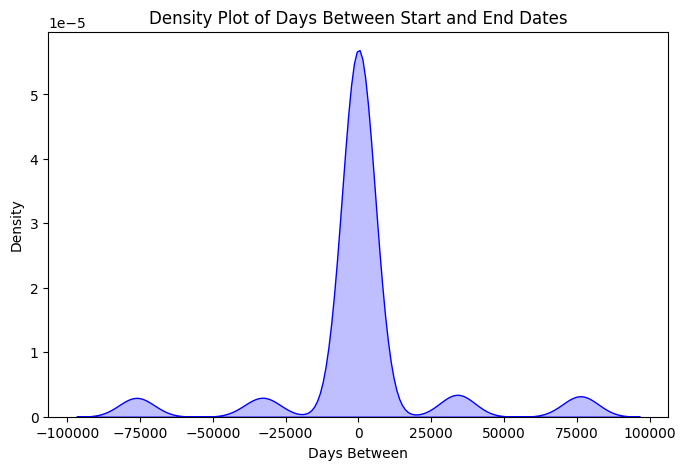

In [70]:
plt.figure(figsize=(8, 5))
sns.kdeplot(checkouts_df['days_lent'].dropna(), fill=True, color="blue")
plt.xlabel("Days Between")
plt.ylabel("Density")
plt.title("Density Plot of Days Between Start and End Dates")
plt.show()

In [71]:
checkouts_df['days_lent'] = checkouts_df['days_lent'].apply(lambda x: abs(x) if pd.notna(x) else x)

In [72]:
threshold = checkouts_df['days_lent'].quantile(0.81)       # 178 days. Everything above this number is higher than 19146 days (52 years).
checkouts_df.loc[checkouts_df['days_lent'] > threshold, 'days_lent'] = None

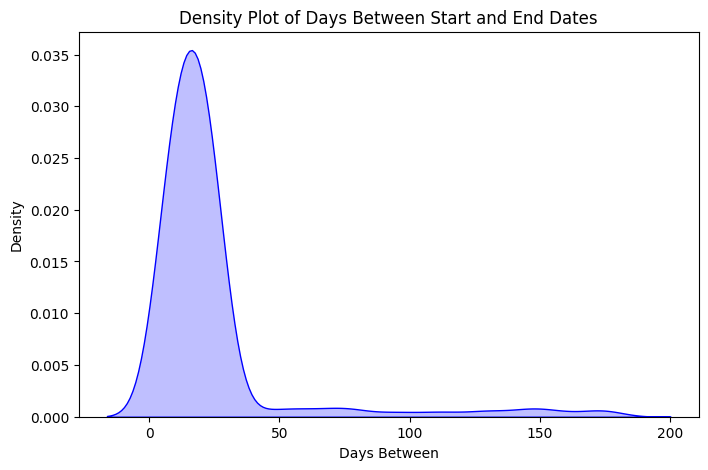

In [73]:
plt.figure(figsize=(8, 5))
sns.kdeplot(checkouts_df['days_lent'].dropna(), fill=True, color="blue")
plt.xlabel("Days Between")
plt.ylabel("Density")
plt.title("Density Plot of Days Between Start and End Dates")
plt.show()

In [74]:
checkouts_df

,id,patron_id,library_id,date_checkout,date_returned,days_lent
0,-xFj0vTLbRIC,b071c9c68228a2b1d00e6f53677e16da,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13,76.0
1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,14.0
2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24,62.0
3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25,100.0
4,7T9-BAAAQBAJ,2cf3cc3b9e9f6c608767da8d350f77c9,225-222@5xc-jtz-hkf,2018-12-31,1804-01-23,NaN
...,...,...,...,...,...,...
1995,rNbuDwAAQBAJ,91871955f3641857832766ac3f5a0b95,222-222@5xc-jv5-nt9,2018-07-19,2018-08-12,24.0
1996,rcrCAgAAQBAJ,ad08956eb20efb746af650f906d439cf,22d-222@5xc-kcy-8sq,2018-03-07,2018-03-13,6.0
1997,F44fAQAAMAAJ,026262cc3454149303074c4113b5f118,226-222@5xc-jxj-7yv,2018-06-17,2018-06-27,10.0
1998,Ci1HAQAAMAAJ,08b29865e58e9b2aabff9684a703acf0,223-222@5xc-jxr-tgk,2018-12-10,2018-12-29,19.0


# Analysis

In [75]:
print("Only", len(checkouts_df[checkouts_df['days_lent'] > 28]), "rows contain late returns.")

Only 142 rows contain late returns.


## Exploratory Data Analysis on Late Returns

- Out of 2000 documented returns, only 142 (7.1%) were late after accounting for incorrect data. This suggests that the problem is not as serious as it may seem.

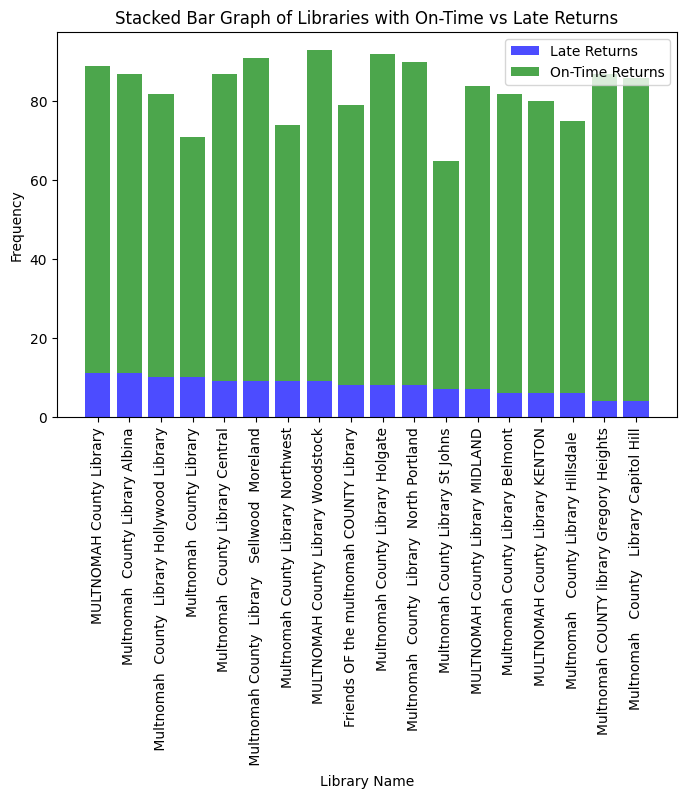

In [76]:
merged_df = libraries_df.merge(checkouts_df, left_on='id', right_on='library_id')

filtered_df = merged_df.copy()
filtered_df['on_time'] = filtered_df['days_lent'] <= 28
filtered_df['late'] = filtered_df['days_lent'] > 28

library_on_time_counts = filtered_df[filtered_df['on_time']].groupby('name').size()
library_late_counts = filtered_df[filtered_df['late']].groupby('name').size()

library_on_time_counts = library_on_time_counts.reindex(library_late_counts.index, fill_value=0)
library_late_counts = library_late_counts.reindex(library_on_time_counts.index, fill_value=0)

sorted_libraries = library_late_counts.sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(sorted_libraries, library_late_counts[sorted_libraries], label='Late Returns', color='blue', alpha=0.7)
ax.bar(sorted_libraries, library_on_time_counts[sorted_libraries], bottom=library_late_counts[sorted_libraries], label='On-Time Returns', color='green', alpha=0.7)

plt.xlabel("Library Name")
plt.ylabel("Frequency")
plt.title("Stacked Bar Graph of Libraries with On-Time vs Late Returns")
plt.xticks(rotation=90)
plt.legend()

plt.show()

- segmenting by library, we can see a minor difference in the frequency of late returns between the libraries, although minor, some libraries have more then double the late return of others. 

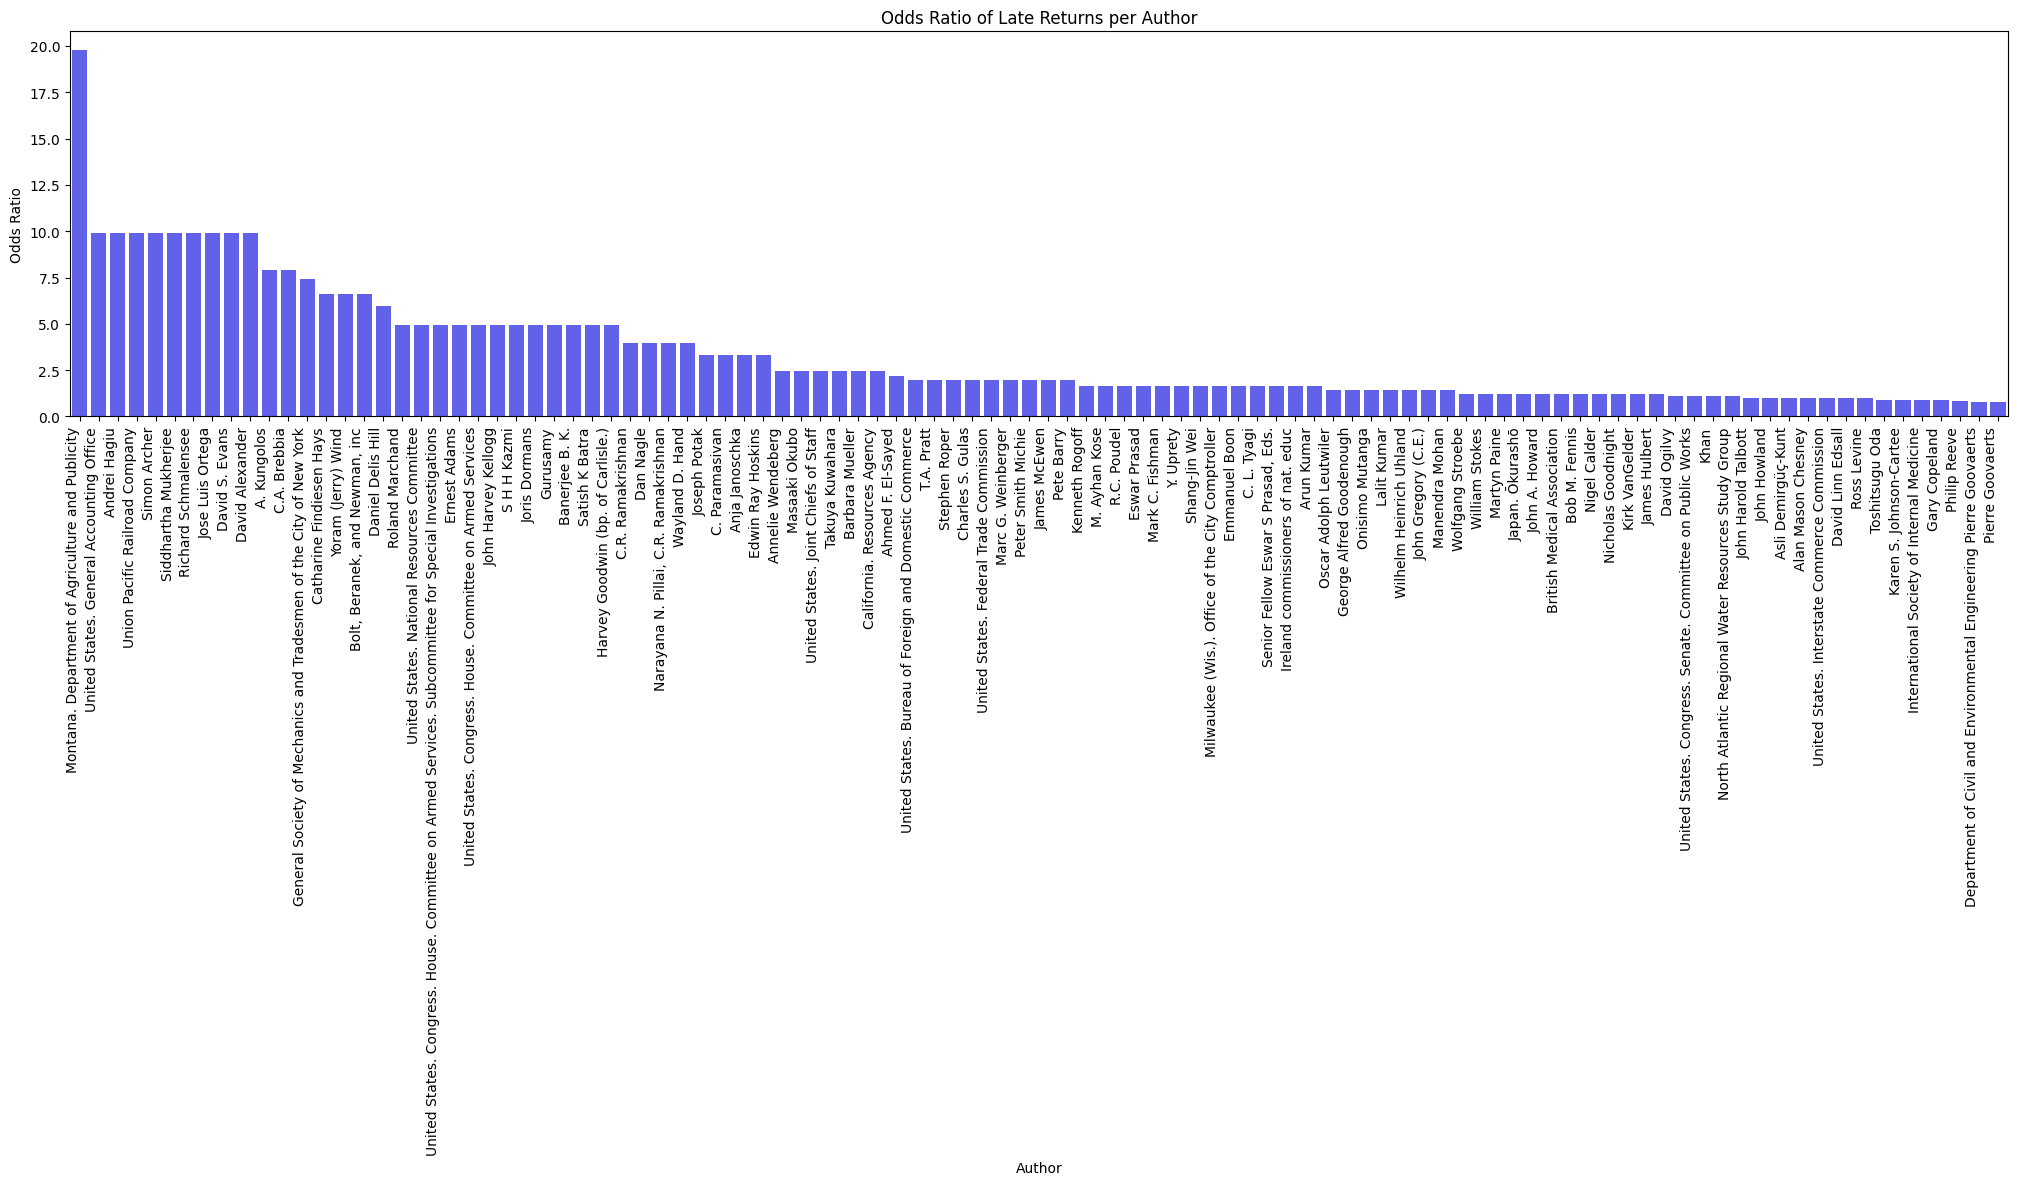

In [77]:
merged_df = books_df.merge(checkouts_df, on='id')
authors_expanded = merged_df.explode('authors')

late_counts = authors_expanded[authors_expanded['days_lent'] > 28]['authors'].value_counts()
on_time_counts = authors_expanded[authors_expanded['days_lent'] <= 28]['authors'].value_counts()

overall_late = len(authors_expanded[authors_expanded['days_lent'] > 28])
overall_on_time = len(authors_expanded[authors_expanded['days_lent'] <= 28])

odds_ratio = (late_counts / on_time_counts) / (overall_late / overall_on_time)
odds_ratio = odds_ratio.dropna().sort_values(ascending=False)

plt.figure(figsize=(25, 5))
sns.barplot(x=odds_ratio.index, y=odds_ratio.values, color="blue", alpha=0.7, order=odds_ratio.index)
plt.xlabel("Author")
plt.ylabel("Odds Ratio")
plt.title("Odds Ratio of Late Returns per Author")
plt.xticks(rotation=90, ha="right")
plt.show()

- Segmenting by Authors, an odds ratio was created to help compare the chances of late returns between different authors.
- odds ratio is the odds of an authos' book being returned late compared to the average late returns. 
- odds ratio was created because some authoers have only one book in the entire dataset, thus using the number/percentage of late returns out of the author's creates inconsistancy 
- as observed from the plot above we can see difference in the chances of late returns very by author. 

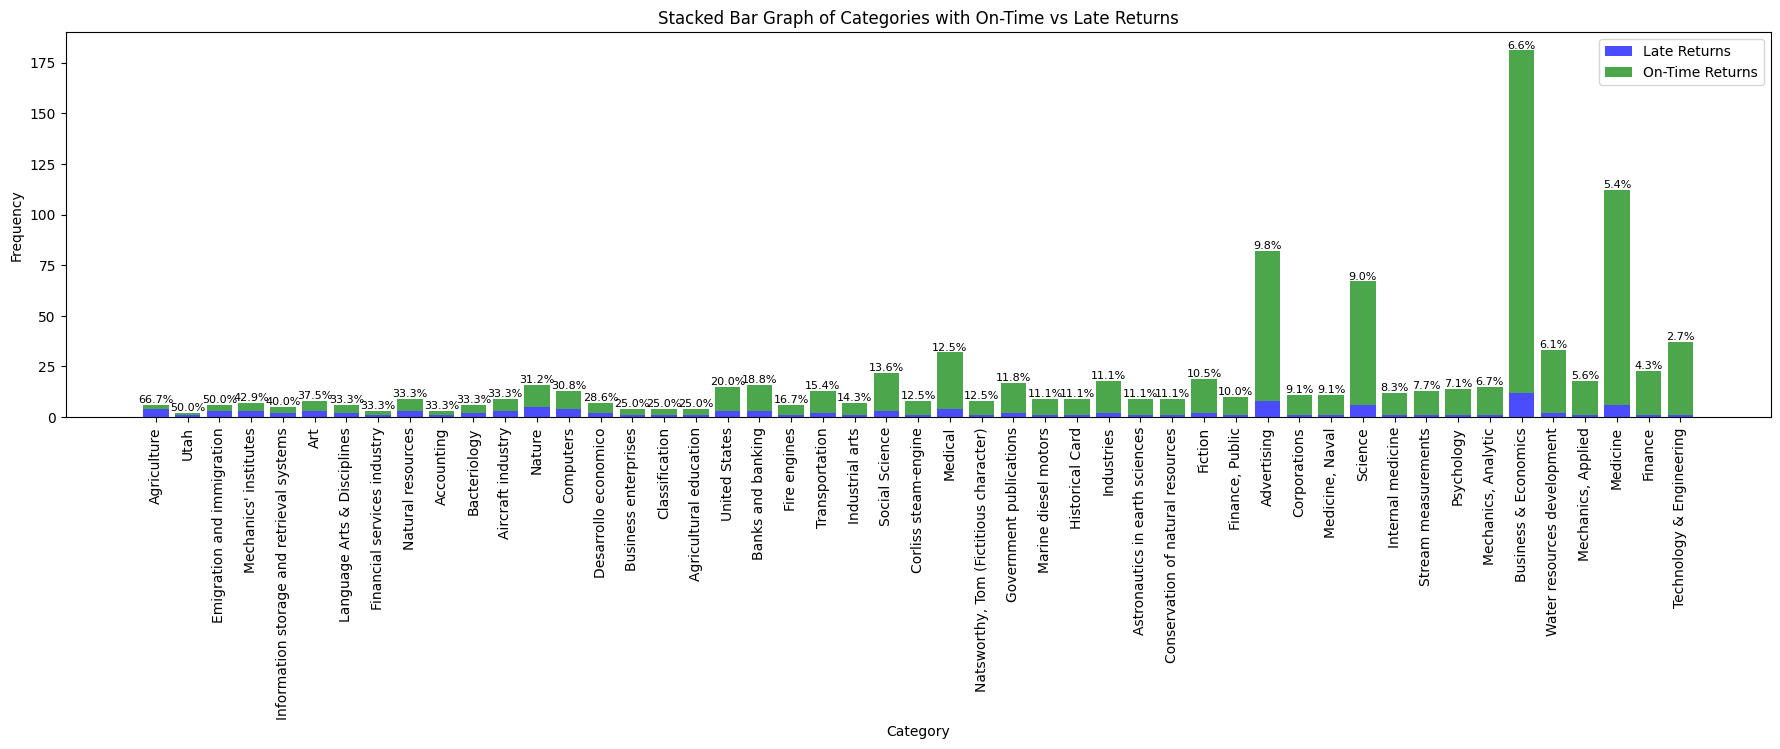

In [78]:
merged_df = books_df.merge(checkouts_df, on='id')

filtered_df = merged_df.copy()
filtered_df['on_time'] = filtered_df['days_lent'] <= 28
filtered_df['late'] = filtered_df['days_lent'] > 28

category_on_time_counts = filtered_df[filtered_df['on_time']].groupby('categories').size()
category_late_counts = filtered_df[filtered_df['late']].groupby('categories').size()

category_on_time_counts = category_on_time_counts.reindex(category_late_counts.index, fill_value=0)
category_late_counts = category_late_counts.reindex(category_on_time_counts.index, fill_value=0)

total_counts = category_on_time_counts + category_late_counts
late_percentage = (category_late_counts / total_counts * 100).round(1)

sorted_categories = late_percentage.sort_values(ascending=False).index

_, ax = plt.subplots(figsize=(22, 5))
bars1 = ax.bar(sorted_categories, category_late_counts[sorted_categories], label='Late Returns', color='blue', alpha=0.7)
bars2 = ax.bar(sorted_categories, category_on_time_counts[sorted_categories], bottom=category_late_counts[sorted_categories], label='On-Time Returns', color='green', alpha=0.7)

for i, bar in enumerate(bars1):
    height = bar.get_height() + bars2[i].get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, f"{late_percentage.loc[sorted_categories[i]]}%", ha='center', va='bottom', fontsize=8)

plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Stacked Bar Graph of Categories with On-Time vs Late Returns")
plt.xticks(rotation=90)
plt.legend()

plt.show()

- data was segmented by book category, however, I could not see significant difference amoung categories for late returns to attribute to a (group of) category(ies). 
- although there is a possibly to aggregate the categories into larger categories, we would want to first explore patterns in other variables.  

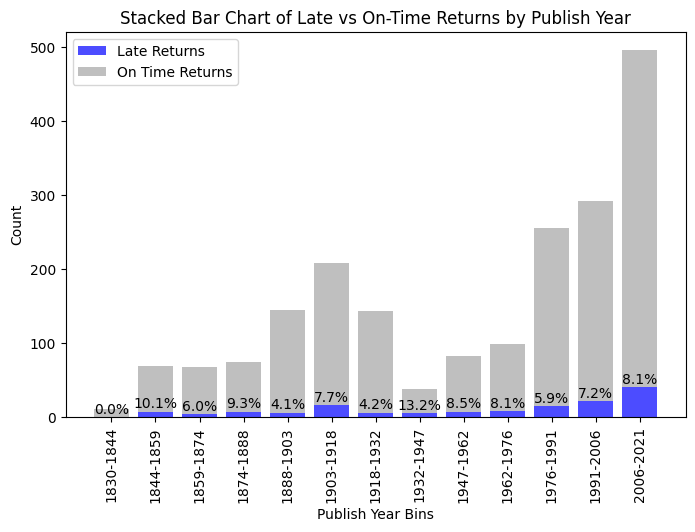

In [79]:
merged_df = books_df.merge(checkouts_df, on='id')

merged_df = merged_df.dropna(subset=['publishedDate'])
merged_df['publishedDate'] = pd.to_numeric(merged_df['publishedDate'], errors='coerce')
merged_df = merged_df.dropna(subset=['publishedDate'])

late_returns = merged_df[merged_df['days_lent'] > 28]
all_returns = merged_df

bin_edges = np.histogram_bin_edges(all_returns['publishedDate'], bins='auto')

all_counts, _ = np.histogram(all_returns['publishedDate'], bins=bin_edges)
late_counts, _ = np.histogram(late_returns['publishedDate'], bins=bin_edges)

bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges) - 1)]
percentages = np.where(all_counts > 0, (late_counts / all_counts) * 100, 0)

plt.figure(figsize=(8, 5))
bar_width = 0.8

bars1 = plt.bar(bin_labels, late_counts, width=bar_width, label="Late Returns", color="blue", alpha=0.7)
bars2 = plt.bar(bin_labels, all_counts - late_counts, width=bar_width, bottom=late_counts, label="On Time Returns", color="gray", alpha=0.5)

for bar, pct in zip(bars1, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f"{pct:.1f}%", ha='center', fontsize=10)

plt.xlabel("Publish Year Bins")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Late vs On-Time Returns by Publish Year")
plt.xticks(rotation=90)
plt.legend()
plt.show()

- No obvious correlation between book publish year and late returns.

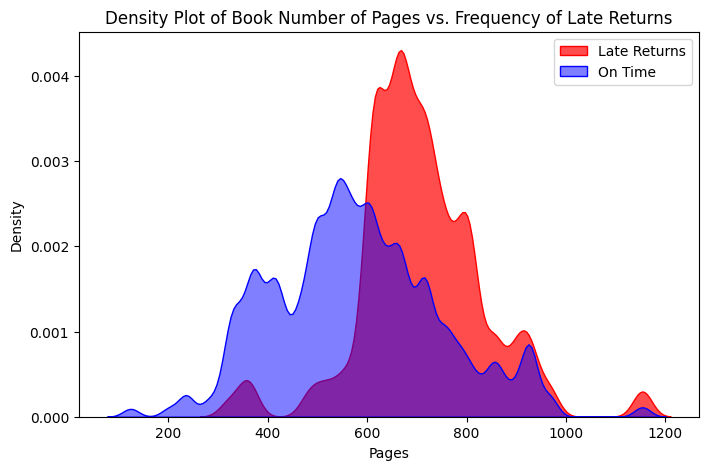

In [80]:
merged_df = books_df.merge(checkouts_df, on='id')

merged_df = merged_df.dropna(subset=['pages'])
merged_df['pages'] = pd.to_numeric(merged_df['pages'], errors='coerce')
merged_df = merged_df.dropna(subset=['pages'])

late_returns = merged_df[merged_df['days_lent'] > 28]
on_time = merged_df[merged_df['days_lent'] <= 28]


plt.figure(figsize=(8, 5))
sns.kdeplot(late_returns['pages'], bw_adjust=0.4, fill=True, color="red", alpha=0.7, label="Late Returns")
sns.kdeplot(on_time['pages'], bw_adjust=0.4, fill=True, color="blue", alpha=0.5, label="On Time")

plt.xlabel("Pages")
plt.ylabel("Density")
plt.title("Density Plot of Book Number of Pages vs. Frequency of Late Returns")
plt.legend()
plt.show()

In [81]:
hypothesis_df = merged_df[['days_lent', 'pages']]
hypothesis_df['late'] = (hypothesis_df['days_lent'] > 28).astype(int)
hypothesis_df = hypothesis_df[['pages', 'late']]

# Split pages into two groups based on the late column
pages_late = hypothesis_df[hypothesis_df['late'] == 1]['pages']
pages_not_late = hypothesis_df[hypothesis_df['late'] == 0]['pages']

# Perform Welch's t-test
stat, p_value = stats.ttest_ind(pages_late, pages_not_late, equal_var=False)
print(f"Welch's t-test results:")
print(f"Statistic: {stat:.2f}, p-value: {p_value:.2f}")

Welch's t-test results:
Statistic: 11.18, p-value: 0.00


C:\Users\Andy\AppData\Local\Temp\ipykernel_116300\2894781169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis_df['late'] = (hypothesis_df['days_lent'] > 28).astype(int)


- a density graph reveals a high correlation between book pages and late return. 
- Following up by a quick welch's t test, testing the difference in mean for books on time vs late, results show a high confidence level that difference is not due to random chance (p-val: <0.0001)  

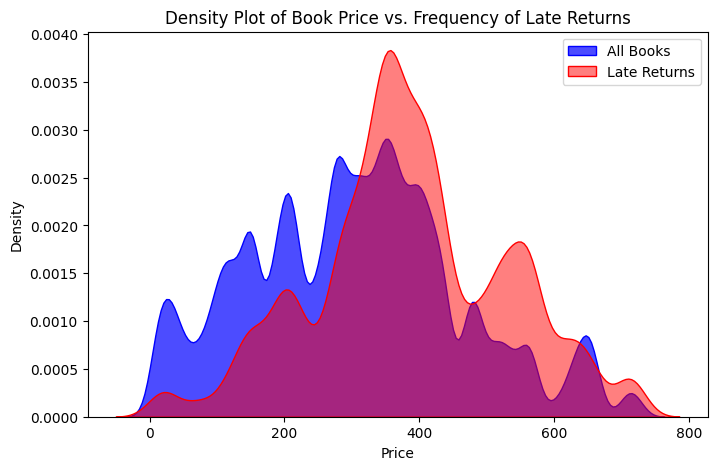

In [82]:
merged_df = books_df.merge(checkouts_df, on='id')

merged_df = merged_df.dropna(subset=['price'])
merged_df['price'] = pd.to_numeric(merged_df['price'], errors='coerce')
merged_df = merged_df.dropna(subset=['price'])

late_returns = merged_df[merged_df['days_lent'] > 28]

plt.figure(figsize=(8, 5))
sns.kdeplot(merged_df['price'], bw_adjust=0.4, fill=True, color="blue", alpha=0.7, label="All Books")
sns.kdeplot(late_returns['price'], bw_adjust=0.4, fill=True, color="red", alpha=0.5, label="Late Returns")

plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Density Plot of Book Price vs. Frequency of Late Returns")
plt.legend()
plt.show()

- More expensive books are noticeably more likely to be returned late compared to the average book. However a confounding variable bias may occur because it is likely that books with more pages are also more expensive. 

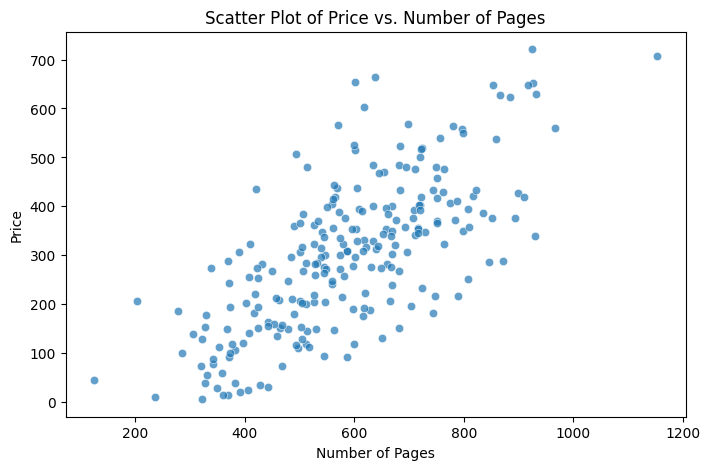

In [83]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=books_df, x='pages', y='price', alpha=0.7)
plt.xlabel("Number of Pages")
plt.ylabel("Price")
plt.title("Scatter Plot of Price vs. Number of Pages")
plt.show()

- this scatter plot above shows a high correlation between price and number of pages, confirming that price is likely a confounding variable. 

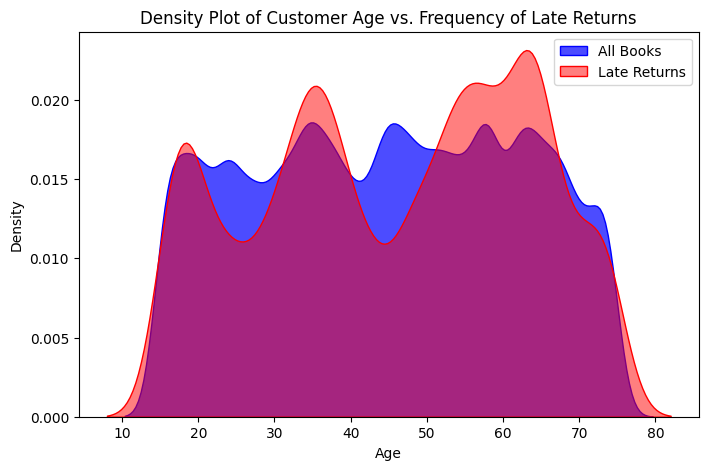

In [84]:
merged_df = customers_df.merge(checkouts_df, left_on='id', right_on='patron_id')

merged_df = merged_df.dropna(subset=['age'])
merged_df['age'] = pd.to_numeric(merged_df['age'], errors='coerce')
merged_df = merged_df.dropna(subset=['age'])

late_returns = merged_df[merged_df['days_lent'] > 28]

plt.figure(figsize=(8, 5))
sns.kdeplot(merged_df['age'], bw_adjust=0.4, fill=True, color="blue", alpha=0.7, label="All Books")
sns.kdeplot(late_returns['age'], bw_adjust=0.4, fill=True, color="red", alpha=0.5, label="Late Returns")

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Density Plot of Customer Age vs. Frequency of Late Returns")
plt.legend()
plt.show()

No conclusion can be made.

C:\Users\Andy\AppData\Local\Temp\ipykernel_116300\2831394033.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{percent_late[i]}%", ha="center", va="center", fontsize=10, color="black", fontweight="bold")


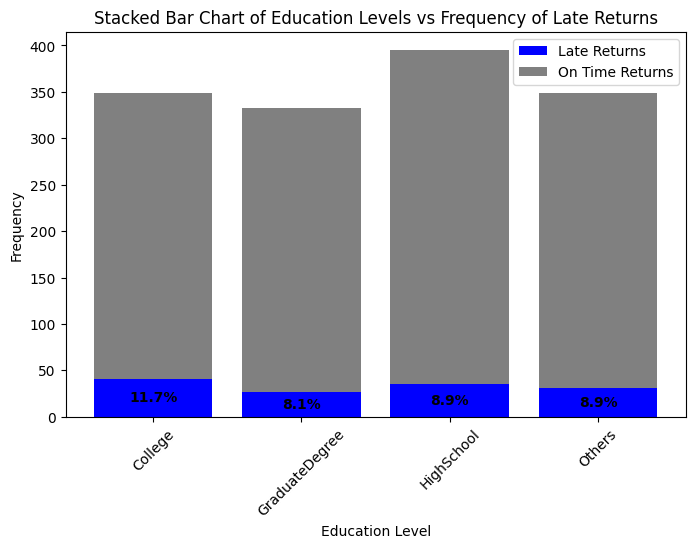

In [85]:
merged_df = customers_df.merge(checkouts_df, left_on='id', right_on='patron_id')

merged_df = merged_df.dropna(subset=['education'])
late_returns = merged_df[merged_df["days_lent"] > 28]
on_time_returns = merged_df[merged_df["days_lent"] <= 28]

late_counts = late_returns["education"].value_counts()
on_time_counts = on_time_returns["education"].value_counts()

education_levels = late_counts.index.union(on_time_counts.index)
late_counts = late_counts.reindex(education_levels, fill_value=0)
on_time_counts = on_time_counts.reindex(education_levels, fill_value=0)

total_counts = late_counts + on_time_counts
percent_late = (late_counts / total_counts * 100).round(1)

plt.figure(figsize=(8, 5))
bars1 = plt.bar(education_levels, late_counts, color="blue", label="Late Returns")
bars2 = plt.bar(education_levels, on_time_counts, bottom=late_counts, color="gray", label="On Time Returns")

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    plt.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() / 2,
             f"{percent_late[i]}%", ha="center", va="center", fontsize=10, color="black", fontweight="bold")

plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.title("Stacked Bar Chart of Education Levels vs Frequency of Late Returns")
plt.xticks(rotation=45)
plt.legend()
plt.show()

No conclusion can be made.

C:\Users\Andy\AppData\Local\Temp\ipykernel_116300\1722666598.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{percent_late[i]}%", ha="center", va="center", fontsize=10, color="black", fontweight="bold")


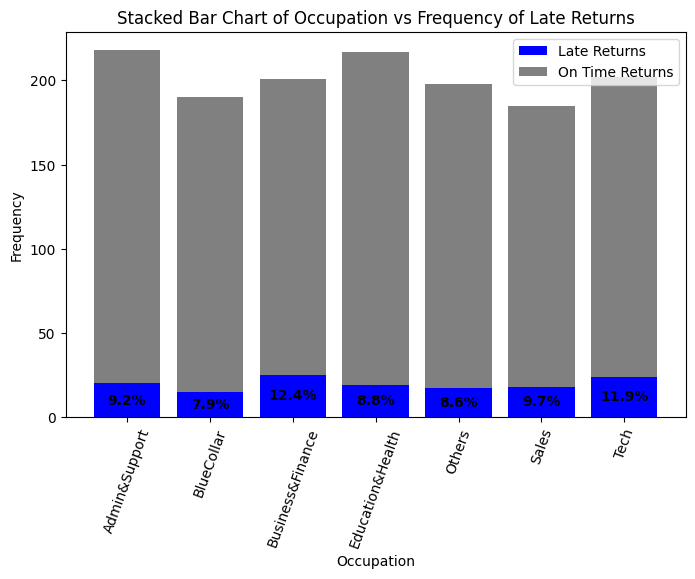

In [86]:
merged_df = customers_df.merge(checkouts_df, left_on='id', right_on='patron_id')

merged_df = merged_df.dropna(subset=['occupation'])
late_returns = merged_df[merged_df["days_lent"] > 28]
on_time_returns = merged_df[merged_df["days_lent"] <= 28]

late_counts = late_returns["occupation"].value_counts()
on_time_counts = on_time_returns["occupation"].value_counts()

education_levels = late_counts.index.union(on_time_counts.index)
late_counts = late_counts.reindex(education_levels, fill_value=0)
on_time_counts = on_time_counts.reindex(education_levels, fill_value=0)

total_counts = late_counts + on_time_counts
percent_late = (late_counts / total_counts * 100).round(1)

plt.figure(figsize=(8, 5))
bars1 = plt.bar(education_levels, late_counts, color="blue", label="Late Returns")
bars2 = plt.bar(education_levels, on_time_counts, bottom=late_counts, color="gray", label="On Time Returns")

for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    plt.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() / 2,
             f"{percent_late[i]}%", ha="center", va="center", fontsize=10, color="black", fontweight="bold")

plt.xlabel("Occupation")
plt.ylabel("Frequency")
plt.title("Stacked Bar Chart of Occupation vs Frequency of Late Returns")
plt.xticks(rotation=70)
plt.legend()
plt.show()

No conclusion can be made.

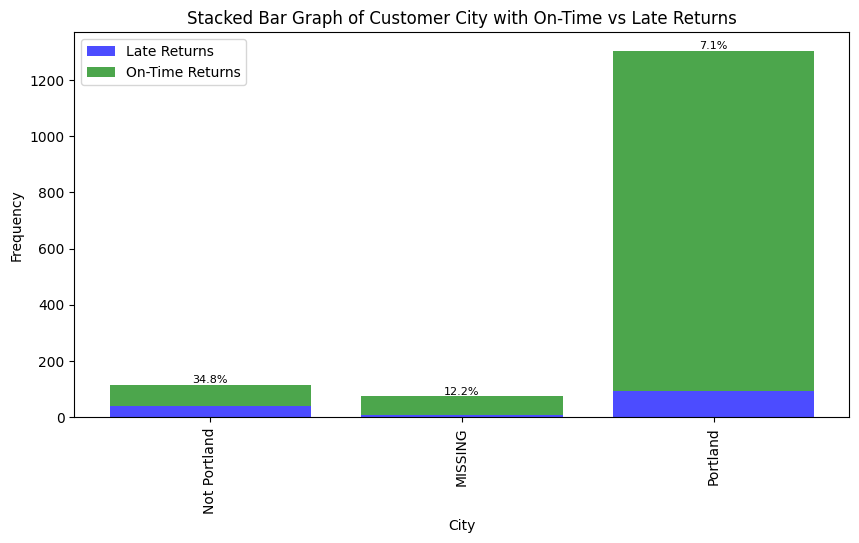

In [87]:
merged_df = customers_df.merge(checkouts_df, left_on='id', right_on="patron_id")

filtered_df = merged_df.copy()
filtered_df['on_time'] = filtered_df['days_lent'] <= 28
filtered_df['late'] = filtered_df['days_lent'] > 28

city_on_time_counts = filtered_df[filtered_df['on_time']].groupby('city').size()
city_late_counts = filtered_df[filtered_df['late']].groupby('city').size()

city_on_time_counts = city_on_time_counts.reindex(city_late_counts.index, fill_value=0)
city_late_counts = city_late_counts.reindex(city_on_time_counts.index, fill_value=0)

total_counts = city_on_time_counts + city_late_counts
late_percentage = (city_late_counts / total_counts * 100).round(1)

sorted_categories = late_percentage.sort_values(ascending=False).index

_, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(sorted_categories, city_late_counts[sorted_categories], label='Late Returns', color='blue', alpha=0.7)
bars2 = ax.bar(sorted_categories, city_on_time_counts[sorted_categories], bottom=city_late_counts[sorted_categories], label='On-Time Returns', color='green', alpha=0.7)

for i, bar in enumerate(bars1):
    height = bar.get_height() + bars2[i].get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, f"{late_percentage.loc[sorted_categories[i]]}%", ha='center', va='bottom', fontsize=8)

plt.xlabel("City")
plt.ylabel("Frequency")
plt.title("Stacked Bar Graph of Customer City with On-Time vs Late Returns")
plt.xticks(rotation=90)
plt.legend()

plt.show()

- There is a substantial difference in late returns between Portland residents and Non-residents, however the non-resident sample size is too small to make any conclusive inferrence. We may want to collect a greater sample of non-residents to confirm a correlation

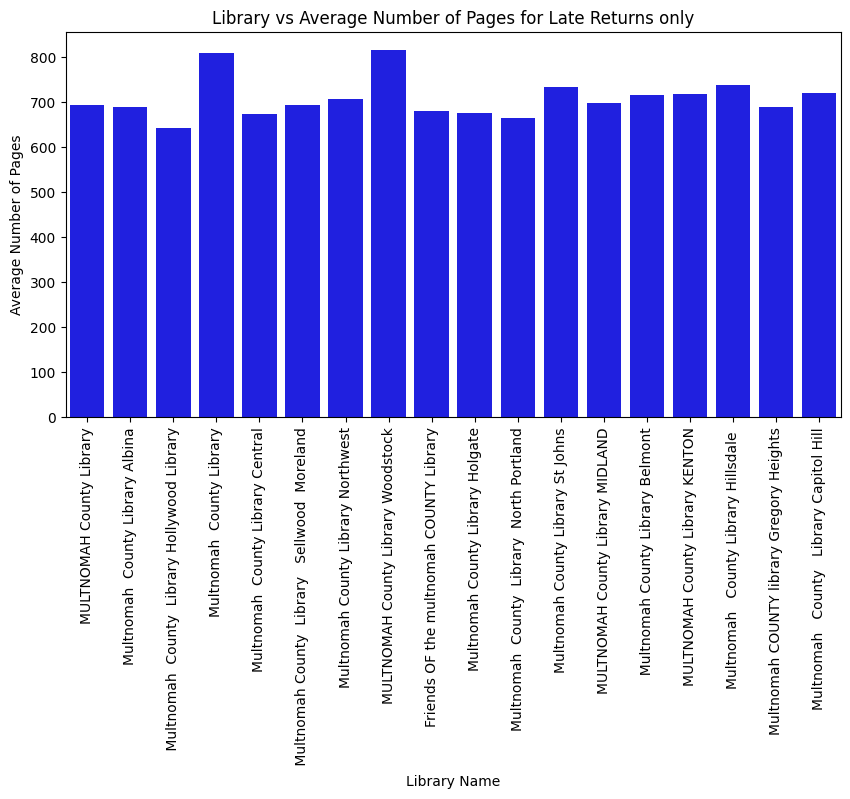

In [88]:
merged_df = libraries_df.merge(checkouts_df, left_on="id", right_on="library_id") \
    .merge(books_df, left_on="id_y", right_on="id")

merged_df = merged_df.dropna(subset=['pages'])
late_returns = merged_df[merged_df["days_lent"] > 28]

avg_pages_per_library = late_returns.groupby("name")["pages"].mean().reindex(sorted_libraries)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_pages_per_library.index, y=avg_pages_per_library.values, color="blue")
plt.xlabel("Library Name")
plt.ylabel("Average Number of Pages")
plt.title("Library vs Average Number of Pages for Late Returns only")
plt.xticks(rotation=90)
plt.show()

No visible correlation between libraries and page sizes of late returned books. This suggests that the libraries are an independent parameter amidst the causes of late returns.

C:\Users\Andy\AppData\Local\Temp\ipykernel_116300\2917896875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_returns["authors"] = late_returns["authors"].apply(lambda x: x if x else None)


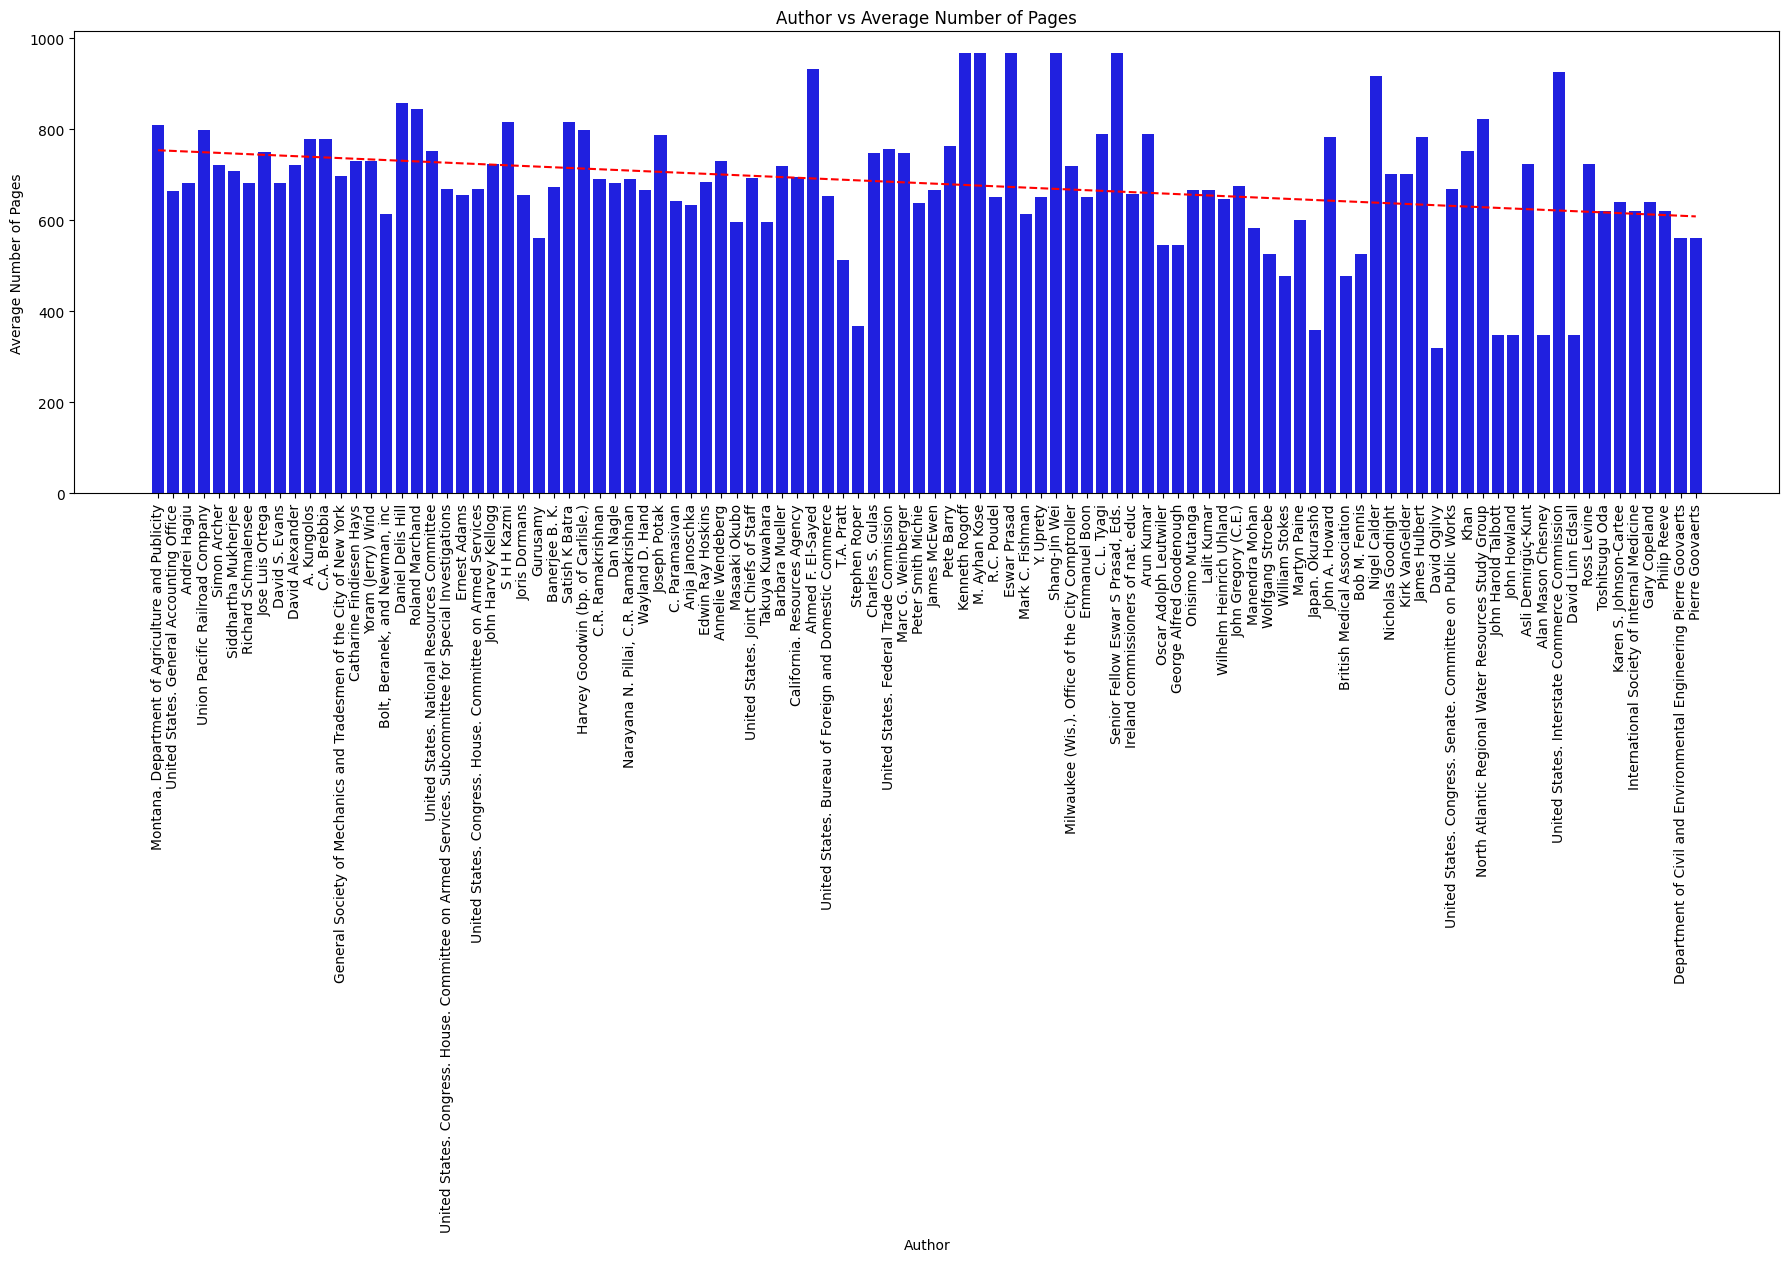

In [89]:
merged_df = books_df.merge(checkouts_df, on="id")

late_returns = merged_df[merged_df["days_lent"] > 28]
late_returns["authors"] = late_returns["authors"].apply(lambda x: x if x else None)
late_returns = late_returns.dropna(subset=['authors'])
late_returns = late_returns.explode('authors')

avg_pages_per_author = late_returns.groupby("authors")["pages"].mean().reindex(odds_ratio.index)

plt.figure(figsize=(22, 6))
sns.barplot(x=avg_pages_per_author.index, y=avg_pages_per_author.values, color="blue")

# Draw a line of best fit
from scipy.stats import linregress

x = range(len(avg_pages_per_author))
y = avg_pages_per_author.values

slope, intercept, _, _, _ = linregress(x, y)
line_of_best_fit = [slope * xi + intercept for xi in x]

plt.plot(x, line_of_best_fit, color='red', linestyle='--', label="Line of Best Fit")

plt.xlabel("Author")
plt.ylabel("Average Number of Pages")
plt.title("Author vs Average Number of Pages")
plt.xticks(rotation=90)
plt.show()

Based on this, it's safe to say that the authors is not an independent parameter and is just correlated with the number of pages in this dataset.

# Learning

Selecting the relevant columns

In [90]:
merged_df = books_df.merge(checkouts_df, on="id").merge(libraries_df, left_on="library_id", right_on="id")
merged_df["late"] = merged_df["days_lent"] > 28
final_df = merged_df[["pages", "name", "late"]]
final_df

,pages,name,late
0,320,Multnomah County Library Belmont,False
1,320,Multnomah County Library Northwest,False
2,320,MULTNOMAH County Library MIDLAND,False
3,320,Multnomah County Library St Johns,False
4,320,Multnomah County Library St Johns,False
...,...,...,...
1995,544,Multnomah County Library,False
1996,544,Multnomah County Library Albina,False
1997,544,Multnomah County Library,False
1998,544,Multnomah County Library Albina,False


Undersampling the dataset using random sampling to balance the "late" (target) column while keeping the distributions of the other columns intact.

In [91]:
true_df = final_df[final_df["late"]].copy()
false_df = final_df[~final_df["late"]].copy()

false_sample = false_df.groupby("name", group_keys=False).apply(lambda x: x.sample(min(len(x), 142 // 18))).reset_index(drop=True)

balanced_df = pd.concat([true_df, false_sample]).sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df

C:\Users\Andy\AppData\Local\Temp\ipykernel_116300\3055279724.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  false_sample = false_df.groupby("name", group_keys=False).apply(lambda x: x.sample(min(len(x), 142 // 18))).reset_index(drop=True)


,pages,name,late
0,616,Multnomah County Library Central,True
1,931,Multnomah County Library North Portland,False
2,720,Multnomah County Library,True
3,752,MULTNOMAH County Library,True
4,809,Multnomah County Library Albina,True
...,...,...,...
263,730,Multnomah County Library St Johns,True
264,423,MULTNOMAH County Library MIDLAND,False
265,927,MULTNOMAH County Library Woodstock,True
266,682,MULTNOMAH County Library MIDLAND,True


Encoding the categorical columns using ordinal encoding. The Random Forest model is tree-based and thus works fine with ordinal encoding. Similarly, normalization isn't necessary for the same reason.

In [92]:
encoder = OrdinalEncoder()
balanced_df[["name", "late"]] = encoder.fit_transform(balanced_df[["name", "late"]])
balanced_df

,pages,name,late
0,616,13.0,1.0
1,931,10.0,0.0
2,720,11.0,1.0
3,752,4.0,1.0
4,809,12.0,1.0
...,...,...,...
263,730,17.0,1.0
264,423,6.0,0.0
265,927,7.0,1.0
266,682,6.0,1.0


Train-test split ensuring that the split is balanced in the target.

In [93]:
X = balanced_df.drop(columns=["late"])
y = balanced_df["late"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Grid Search with Cross Validation for Hyper-Parameter optimization.

In [94]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

train_accuracy = best_rf.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Training Accuracy: 0.7991


Testing

In [95]:
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7222222222222222


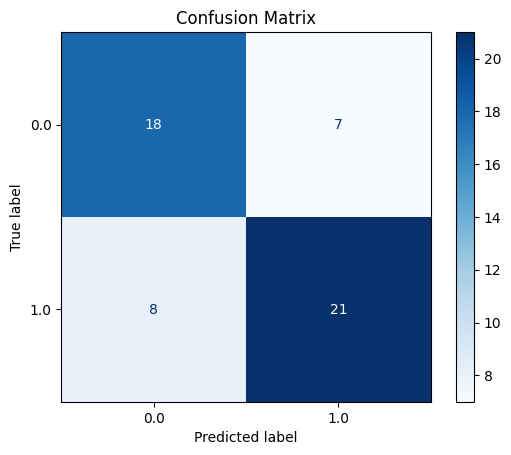

In [96]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

The model is more accurate on true positives (high recall) which is the objective (correctly predicting late returns is more important than correctly predicting on-time returns).
The model can be further improved by augmenting the late returns data, or better yet acquiring more true late return data.

# Book Recommendation System

Creating a book hybrid recommendation system. It takes into account the customer's previously checked-out books, their categories, and their authors. Finally, while incorporating the overall books popularities, recommends 10 most similar and popular books for the customer.

In [97]:
merged_books_checkouts = books_df.merge(checkouts_df, on='id')

book_popularity = merged_books_checkouts['id'].value_counts().reset_index()
book_popularity.columns = ['id', 'popularity']

In [98]:
def recommend_books_for_customer(customer_id, books_df, checkouts_df, book_popularity):
    # Get the books checked out by the customer
    customer_checkouts = checkouts_df[checkouts_df['patron_id'] == customer_id]
    customer_books = books_df[books_df['id'].isin(customer_checkouts['id'])]

    if len(customer_books) > 0:
        # Get categories and authors for the customer's books
        customer_categories = customer_books['categories'].unique()
        customer_authors = customer_books['authors'].explode().unique()

        # Filter all books (excluding books the customer has already checked out)
        filtered_books = books_df[~books_df['id'].isin(customer_checkouts['id'])]

        # Merge with the popularity data
        filtered_books_popularity = filtered_books.merge(book_popularity, on='id', how='left').fillna(0)

        # Calculate the score for each book
        def calculate_score(book):
            # Popularity score
            popularity_score = book_popularity.loc[book_popularity['id'] == book['id'], 'popularity'].values[0]

            # Category score (how many categories match the customer's categories)
            category_score = 18 if book['categories'] in customer_categories else 0

            # Author score (how many authors match the customer's authors)
            author_score = sum(9 for author in customer_authors if author in book['authors'])

            # Combine the scores: popularity, category, and author scores
            return popularity_score + category_score + author_score

        # Apply the score calculation to all books
        filtered_books_popularity['score'] = filtered_books_popularity.apply(calculate_score, axis=1)

        # Sort the books by the score and select the top 10
        recommended_books = filtered_books_popularity.sort_values(by='score', ascending=False)

        # Return the top 10 books with the highest scores
        return recommended_books[['id', 'title', 'popularity', 'score']].head(10)

    else:
        return pd.DataFrame()

def display_customer_recommendations(customer_id):
    print(f"\n=== Recommendations for Customer {customer_id} ===\n")

    # Get the books the customer has checked out
    customer_books = checkouts_df[checkouts_df['patron_id'] == customer_id].merge(books_df, on='id')

    print("📚 Books the Customer Checked Out:")
    for _, row in customer_books.iterrows():
        print(f"  - ID: {row['id']}, Title: \"{row['title']}\", Category: {row['categories']}, Authors: {', '.join(row['authors'])}")

    print("\n🔽 Recommended Books:")
    recommended_books = recommend_books_for_customer(customer_id, books_df, checkouts_df, book_popularity)
    recommended_books = recommended_books.merge(books_df[['id', 'categories', 'authors']], on='id', how='left')

    for i, (_, row) in enumerate(recommended_books.iterrows(), start=1):
        print(f"  {i}. \"{row['title']}\" (ID: {row['id']})")
        print(f"     🔹 Category: {row['categories']}")
        print(f"     🔹 Authors: {', '.join(row['authors'])}")
        print(f"     🔹 Popularity: {row['popularity']}, Score: {row['score']}\n")

Testing the recommendation system

In [99]:
random_customers = random.sample(list(checkouts_df['patron_id'].unique()), 3)

for customer_id in random_customers:
    display_customer_recommendations(customer_id)
    print('\n')


=== Recommendations for Customer 62eddaf1c058f77d8098e7c348cb0001 ===

📚 Books the Customer Checked Out:
  - ID: YoLor8-zRDEC, Title: "The Resources and Attractions of Utah", Category: Utah, Authors: Union Pacific Railroad Company

🔽 Recommended Books:
  1. "Old Dominion Journal of Medicine and Surgery" (ID: _L9IAAAAYAAJ)
     🔹 Category: nan
     🔹 Authors: 
     🔹 Popularity: 18, Score: 18

  2. "Geostatistics for Natural Resources Evaluation" (ID: CW-7tHAaVR0C)
     🔹 Category: Science
     🔹 Authors: Pierre Goovaerts, Department of Civil and Environmental Engineering Pierre Goovaerts
     🔹 Popularity: 16, Score: 16

  3. "The Mirror Makers" (ID: QlVB6ARdT7kC)
     🔹 Category: Business & Economics
     🔹 Authors: Stephen R. Fox
     🔹 Popularity: 15, Score: 15

  4. "Technical Report - South Carolina Marine Resources Division" (ID: lMkmAQAAMAAJ)
     🔹 Category: Marine resources
     🔹 Authors: South Carolina. Marine Resources Division
     🔹 Popularity: 15, Score: 15

  5. "Aircr